# **Import Packages and Data Gathering**

In [243]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')
import cv2
import random
from collections import Counter

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import json
from tensorflow.keras.callbacks import EarlyStopping

In [244]:
train_dir = '/kaggle/input/pytorch-challange-flower-dataset/dataset/train'
valid_dir = '/kaggle/input/pytorch-challange-flower-dataset/dataset/valid'
test_dir = '/kaggle/input/pytorch-challange-flower-dataset/dataset/test'

In [245]:
with open('/kaggle/input/pytorch-challange-flower-dataset/cat_to_name.json', 'r') as f:
    class_names = json.load(f)

# **Exploring Dataset**

In [246]:
# Function to display images
def display_images(img_paths):
    plt.figure(figsize=(10, 10))
    for i, img_path in enumerate(img_paths):
        img = image.load_img(img_path, target_size=(150, 150))
        img = image.img_to_array(img)
        img = img / 255.0  # Normalize
        plt.subplot(3, 3, i + 1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

In [247]:
# Random 9 images
train_sample_dir = os.path.join(train_dir, random.choice(os.listdir(train_dir)))  
train_img_paths = [os.path.join(train_sample_dir, img) for img in random.sample(os.listdir(train_sample_dir), 9)]

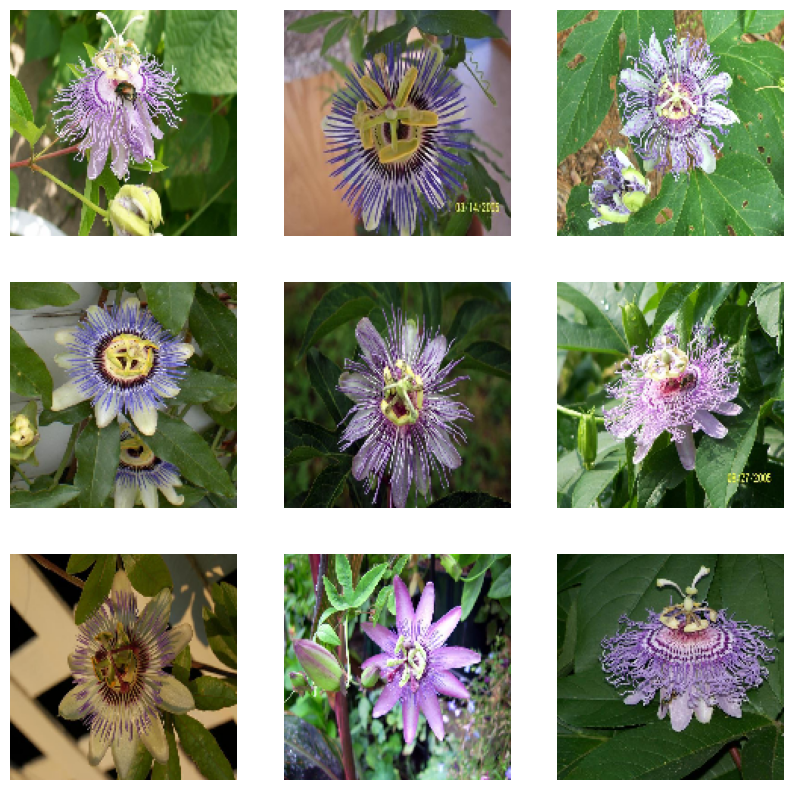

In [248]:
display_images(train_img_paths)

In [249]:
# Explore the dataset structure: Count the images in each category (train, valid, test)
def count_images_in_directory(directory):
    image_counts = {}
    
    categories = [cat for cat in os.listdir(directory) if os.path.isdir(os.path.join(directory, cat))]
    
    for category in categories:
        category_dir = os.path.join(directory, category)
        image_counts[category] = len(os.listdir(category_dir)) 
    
    return image_counts

train_image_counts = count_images_in_directory(train_dir)
valid_image_counts = count_images_in_directory(valid_dir)
test_image_counts = count_images_in_directory(test_dir)

print("Training Set:", train_image_counts)
print("Validation Set:", valid_image_counts)
print("Test Set:", test_image_counts)

Training Set: {'7': 33, '47': 61, '17': 60, '81': 135, '19': 38, '22': 47, '2': 49, '35': 33, '92': 53, '50': 73, '23': 72, '87': 51, '10': 38, '5': 54, '61': 36, '36': 62, '20': 46, '45': 33, '60': 85, '27': 36, '64': 42, '41': 97, '89': 153, '39': 33, '32': 36, '98': 68, '25': 34, '42': 49, '52': 67, '75': 95, '8': 70, '38': 44, '12': 73, '94': 132, '55': 56, '49': 38, '31': 48, '62': 48, '53': 70, '101': 49, '70': 51, '34': 28, '18': 65, '79': 34, '85': 48, '88': 116, '65': 88, '67': 36, '78': 112, '28': 55, '66': 51, '56': 92, '72': 77, '16': 36, '13': 38, '99': 50, '26': 33, '74': 142, '15': 38, '3': 36, '90': 66, '69': 46, '77': 205, '102': 36, '86': 48, '95': 101, '43': 100, '91': 59, '71': 64, '1': 27, '58': 86, '59': 56, '97': 54, '30': 61, '14': 44, '76': 83, '84': 66, '4': 44, '83': 104, '82': 82, '57': 50, '9': 41, '96': 72, '46': 157, '21': 34, '44': 73, '40': 54, '80': 82, '6': 35, '11': 68, '68': 43, '63': 42, '37': 92, '51': 206, '33': 31, '100': 35, '54': 47, '48': 57,

In [250]:
train_categories = list(train_image_counts.keys())
train_counts = list(train_image_counts.values())
valid_categories = list(valid_image_counts.keys())
valid_counts = list(valid_image_counts.values())

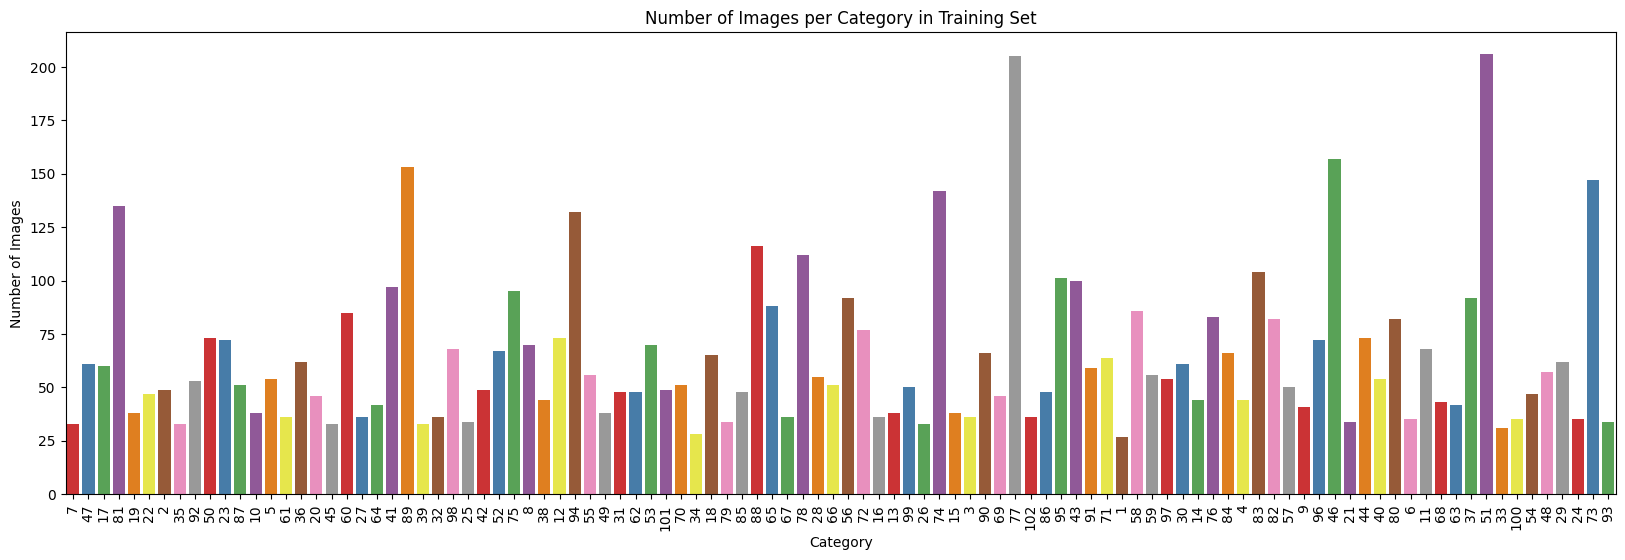

In [251]:
# Plot the image distribution for the training set
plt.figure(figsize=(20, 6))
sns.barplot(x=train_categories, y=train_counts, palette='Set1')
plt.xticks(rotation=90)
plt.title('Number of Images per Category in Training Set')
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.show()

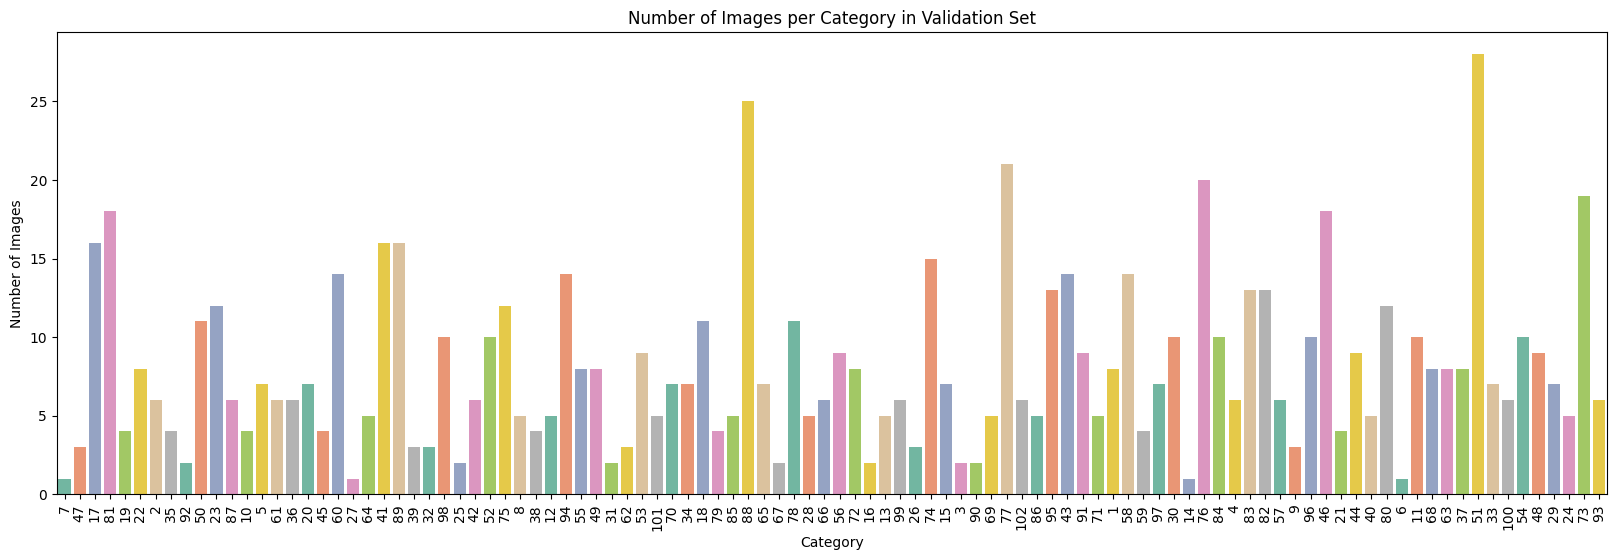

In [252]:
# Plot the image distribution for the validation set
plt.figure(figsize=(20, 6))
sns.barplot(x=valid_categories, y=valid_counts, palette='Set2')
plt.xticks(rotation=90)
plt.title('Number of Images per Category in Validation Set')
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.show()

# **Image Processing**

In [253]:
# Augment images
datagen = ImageDataGenerator(rotation_range=30, width_shift_range=0.2,
                             height_shift_range=0.2, shear_range=0.2,
                             zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [254]:
# Load one image to augment
img_path = train_img_paths[0]  
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

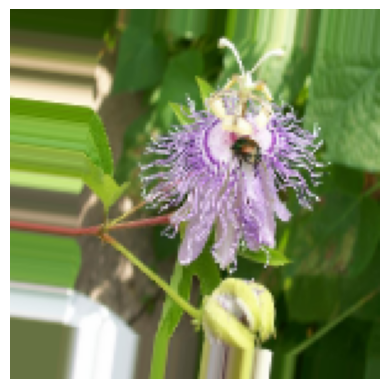

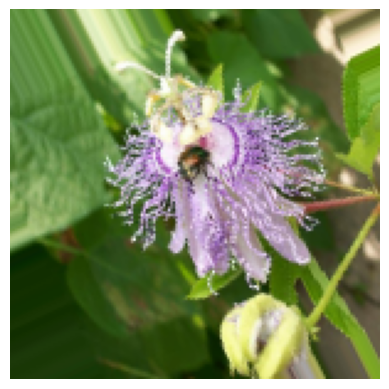

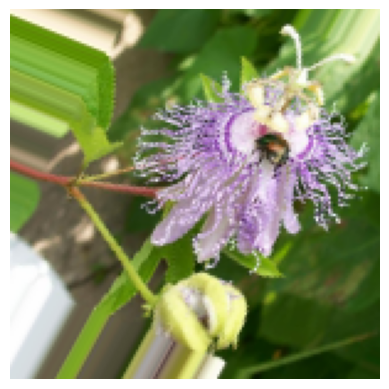

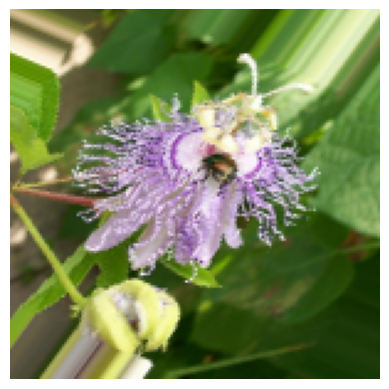

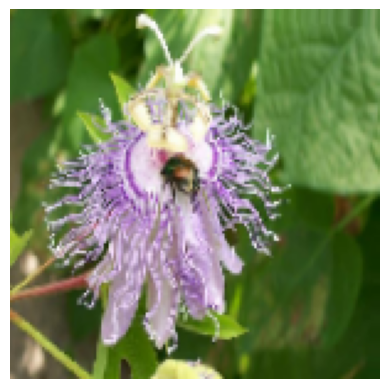

In [255]:
# Generate augmented images and visualize them
i = 0
for batch in datagen.flow(x, batch_size=4):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    plt.axis('off')
    i += 1
    if i % 5 == 0:
        break
plt.show()

# **Prepare for CNN Training**

In [256]:
def get_image_size(img_path):
    with Image.open(img_path) as img:
        return img.size
    
img_sizes = [get_image_size(path) for path in train_img_paths[:10]]
print("Image Sizes:", img_sizes)

Image Sizes: [(750, 500), (668, 500), (667, 500), (500, 548), (754, 500), (667, 500), (752, 500), (667, 500), (500, 515)]


In [257]:
# Image Data Generators for resizing and augmentation
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=30, zoom_range=0.2,
                                   shear_range=0.2, horizontal_flip=True)

valid_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)


In [258]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=16,
                                                    class_mode='categorical')

valid_generator = valid_datagen.flow_from_directory(valid_dir,
                                                    target_size=(150, 150),
                                                    batch_size=16,
                                                    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(150, 150),
                                                  batch_size=16,
                                                  class_mode='categorical')

Found 6552 images belonging to 102 classes.
Found 818 images belonging to 102 classes.
Found 0 images belonging to 0 classes.


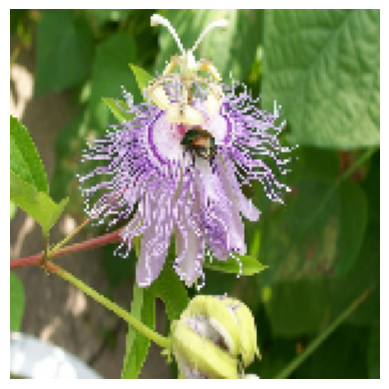

In [259]:
# Visualize resized images
sample_image_path = train_img_paths[0] 
img = image.load_img(sample_image_path, target_size=(150, 150)) 
plt.imshow(img)
plt.axis('off')
plt.show()

In [260]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)), 
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax')  
])

In [261]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [262]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 102)            │        13,158 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,841,510 (18.47 MB)

 Trainable params: 4,841,510 (18.47 MB)

 Non-trainable params: 0 (0.00 B)

In [263]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [265]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // valid_generator.batch_size,
    callbacks=[early_stopping],
)

Epoch 1/10
409/409 ━━━━━━━━━━━━━━━━━━━━ 178s 432ms/step - accuracy: 0.0663 - loss: 4.2193 - val_accuracy: 0.1127 - val_loss: 3.6286
Epoch 2/10
409/409 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.0625 - loss: 3.8815 - val_accuracy: 0.0000e+00 - val_loss: 3.8616
Epoch 3/10
409/409 ━━━━━━━━━━━━━━━━━━━━ 177s 429ms/step - accuracy: 0.0987 - loss: 3.7612 - val_accuracy: 0.1556 - val_loss: 3.3812
Epoch 4/10
409/409 ━━━━━━━━━━━━━━━━━━━━ 0s 97us/step - accuracy: 0.1250 - loss: 3.6170 - val_accuracy: 0.0000e+00 - val_loss: 3.0862
Epoch 5/10
409/409 ━━━━━━━━━━━━━━━━━━━━ 176s 428ms/step - accuracy: 0.1358 - loss: 3.5039 - val_accuracy: 0.2120 - val_loss: 3.1311
Epoch 6/10
409/409 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.2500 - loss: 3.2735 - val_accuracy: 0.0000e+00 - val_loss: 2.8800
Epoch 7/10
409/409 ━━━━━━━━━━━━━━━━━━━━ 174s 424ms/step - accuracy: 0.1676 - loss: 3.3168 - val_accuracy: 0.2549 - val_loss: 2.8737
Epoch 8/10
409/409 ━━━━━━━━━━━━━━━━━━━━ 0s 86us/step - accuracy: 0.1875 - 

In [266]:
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Test accuracy: {test_acc}')

ValueError: Must provide at least one structure

In [ ]:
# Plot accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
